In [18]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from IPython.display import display, HTML

import matplotlib.patches as mpatches
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, precision_recall_curve, auc
from scipy.interpolate import interp1d

**Notes:**

Load data and split data(75%-25%), stratified as done for decision tree.

In [19]:
# Load Data and Split(Train-Test)
df = pd.read_csv('../Data/DT.csv')

# Train Test Split
y = df['account']
X = df.drop(columns=['account','wgt'])
weights = df['wgt']

X_train, X_test, y_train, y_test, weights_train, weights_test = train_test_split(
        X, y, weights, test_size=0.25, random_state=42, stratify=y
    )
display(HTML(f"<b>Train size:</b> {X_train.shape} &nbsp;&nbsp; <b>Test size:</b> {X_test.shape}"))

**Notes:**

Train all the ensemble tree models (Bagging, Random Forest, Extreme Randomized Trees, AdaBoost, Gradient Boost)

In [20]:
# Create and train bagging classifier
bagging_classifier = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=42),
    n_estimators=100,
    random_state=42,
    n_jobs=-1   # use all available processors
)

# Train the model
bagging_classifier.fit(X_train, y_train)

# Make predictions
bagging_pred = bagging_classifier.predict(X_test)
bagging_accuracy = accuracy_score(y_test, bagging_pred)

print(f"Bagging Accuracy: {bagging_accuracy:0.4f}")

# Cross-validation for more robust evaluation
bagging_cv_scores = cross_val_score(bagging_classifier, X_train, y_train, cv=5)
print(f"Bagging Cross-Validation Scores: {bagging_cv_scores}")
print(f"Bagging Mean CV Score: {bagging_cv_scores.mean():0.4f} (+/- {bagging_cv_scores.std()*2:0.4f})")

Bagging Accuracy: 0.7762
Bagging Cross-Validation Scores: [0.76781609 0.7764977  0.77880184 0.79493088 0.77880184]
Bagging Mean CV Score: 0.7794 (+/- 0.0175)


Random Forest Accuracy: 0.7970
Random Forest Cross-Validation Scores: [0.8        0.78801843 0.80875576 0.79953917 0.79723502]
Random Forest Mean CV Score: 0.7987 (+/- 0.0133)


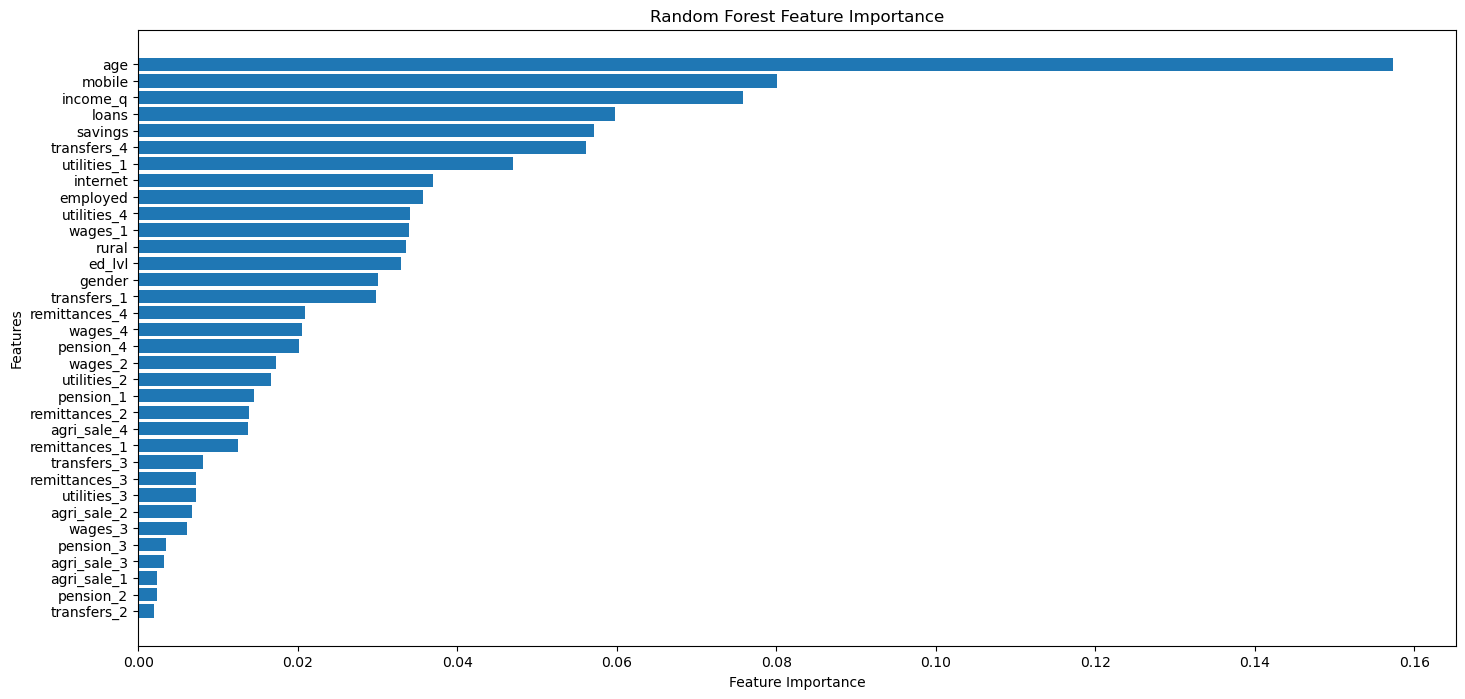

In [21]:
# Create and train Random Forest Classifier
random_forest = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1)

# Train the model
random_forest.fit(X_train, y_train)

# Make prediction
rf_pred = random_forest.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)

print(f"Random Forest Accuracy: {rf_accuracy:0.4f}")

# Cross-validation
rf_cv_scores = cross_val_score(random_forest, X_train, y_train, cv=5)
print(f"Random Forest Cross-Validation Scores: {rf_cv_scores}")
print(f"Random Forest Mean CV Score: {rf_cv_scores.mean():0.4f} (+/- {rf_cv_scores.std()*2:0.4f})")

# Feature importance analysis
feature_importance = random_forest.feature_importances_
feature_names = X.columns

# Create feature importance plot in sorted order
plt.figure(figsize=(17, 8))
sorted_idx = feature_importance.argsort()
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Feature Importance')
plt.tight_layout
plt.show()

In [22]:
# Create and train  Extra Trees Classifier
extra_trees = ExtraTreesClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

extra_trees.fit(X_train, y_train)

extra_trees_pred = extra_trees.predict(X_test)
extra_trees_accuracy = accuracy_score(y_test, extra_trees_pred)

print(f"Extra Trees Accuracy: {extra_trees_accuracy:0.4f}")

# cross-validation
extra_trees_cv_scores = cross_val_score(extra_trees, X_train, y_train, cv=5)
print(f"Extra Trees Cross-Validation Scores: {extra_trees_cv_scores}")
print(f"Extra Trees Mean CV Score: {extra_trees_cv_scores.mean():0.4f} (+/- {extra_trees_cv_scores.std()*2:0.4f})")

Extra Trees Accuracy: 0.7970
Extra Trees Cross-Validation Scores: [0.79770115 0.79953917 0.79953917 0.79723502 0.79723502]
Extra Trees Mean CV Score: 0.7982 (+/- 0.0021)


In [23]:
# Create and train AdaBoost classifier
ada_boost = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1, random_state=42),
    n_estimators=100,
    learning_rate=0.1,
    algorithm='SAMME',
    random_state=42
)

# Train the model
ada_boost.fit(X_train, y_train)

# Make prediction
ada_boost_pred = ada_boost.predict(X_test)
ada_boost_accuracy = accuracy_score(y_test, ada_boost_pred)

print(f"AdaBoost Accuracy: {ada_boost_accuracy:0.4f}")

# Cross-validation
ada_boost_cv_scores = cross_val_score(ada_boost, X_train, y_train, cv=5)
print(f"AdaBoost Cross-Validation Scores: {ada_boost_cv_scores}")
print(f"AdaBoost Mean CV Score: {ada_boost_cv_scores.mean():0.4f} (+/- {ada_boost_cv_scores.std()*2:0.4f})")

AdaBoost Accuracy: 0.7928
AdaBoost Cross-Validation Scores: [0.79310345 0.79262673 0.79262673 0.79262673 0.79262673]
AdaBoost Mean CV Score: 0.7927 (+/- 0.0004)


In [24]:
# Create gradient boosting model
gradient_boost = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

# Train the model
gradient_boost.fit(X_train, y_train)

# Make prediction
gradient_boost_pred = gradient_boost.predict(X_test)
gradient_boost_accuracy = accuracy_score(y_test, gradient_boost_pred)

print(f"Gradient Boosting Accuracy: {gradient_boost_accuracy:0.4f}")

# Cross-validation
gradient_boost_cv_scores = cross_val_score(gradient_boost, X_train, y_train, cv=5)
print(f"Gradient Boosting Cross-Validation Scores: {gradient_boost_cv_scores}")
print(f"Gradient Boosting Mean CV Score: {gradient_boost_cv_scores.mean():0.4f} (+/- {gradient_boost_cv_scores.std()*2:0.4f})")

Gradient Boosting Accuracy: 0.8011
Gradient Boosting Cross-Validation Scores: [0.78850575 0.77880184 0.81336406 0.80414747 0.77880184]
Gradient Boosting Mean CV Score: 0.7927 (+/- 0.0277)


In [25]:
# Model Performance Comparison:
accuracy_table = pd.DataFrame({
    'Method': ['Bagging', 'Random Forest', 'Extra Trees', 'AdaBoost', 'Gradient Boosting'],
    'Accuracy': [bagging_accuracy, rf_accuracy, extra_trees_accuracy, ada_boost_accuracy, gradient_boost_accuracy]
})

accuracy_table['Mean_CV_Score (5 folds)'] = [
    bagging_cv_scores.mean(),
    rf_cv_scores.mean(),
    extra_trees_cv_scores.mean(),
    ada_boost_cv_scores.mean(),
    gradient_boost_cv_scores.mean()
]

accuracy_table['CV_Std_Dev'] = [
    bagging_cv_scores.std(),
    rf_cv_scores.std(),
    extra_trees_cv_scores.std(),
    ada_boost_cv_scores.std(),
    gradient_boost_cv_scores.std()
]

# Display the table
print("\nModel Performance Comparison (5 Folds):")
print("=" * 80)
print(f"{'Model':<25} │ {'Mean_CV_Score ':<20} │ {'CV_Std_Dev':<15}")
print("=" * 80)

for idx, row in pd.DataFrame(accuracy_table).iterrows():
    print(f"{row['Method']:<25} │ {row['Mean_CV_Score (5 folds)']:<20.4f} │ {row['CV_Std_Dev']:<15.4f}")

print("=" * 80)


Model Performance Comparison (5 Folds):
Model                     │ Mean_CV_Score        │ CV_Std_Dev     
Bagging                   │ 0.7794               │ 0.0088         
Random Forest             │ 0.7987               │ 0.0066         
Extra Trees               │ 0.7982               │ 0.0011         
AdaBoost                  │ 0.7927               │ 0.0002         
Gradient Boosting         │ 0.7927               │ 0.0139         


In [26]:
# Get predictions and predicted probabilities for each model

predictions = {
    'Bagging': bagging_pred,
    'Random Forest': rf_pred,
    'Extra Trees': extra_trees_pred,
    'AdaBoost': ada_boost_pred,
    'Gradient Boosting': gradient_boost_pred
}

prob_predictions = {
    'Bagging': bagging_classifier.predict_proba(X_test)[:, 1],
    'Random Forest': random_forest.predict_proba(X_test)[:, 1],
    'Extra Trees': extra_trees.predict_proba(X_test)[:, 1],
    'AdaBoost': ada_boost.predict_proba(X_test)[:, 1],
    'Gradient Boosting': gradient_boost.predict_proba(X_test)[:, 1]
}

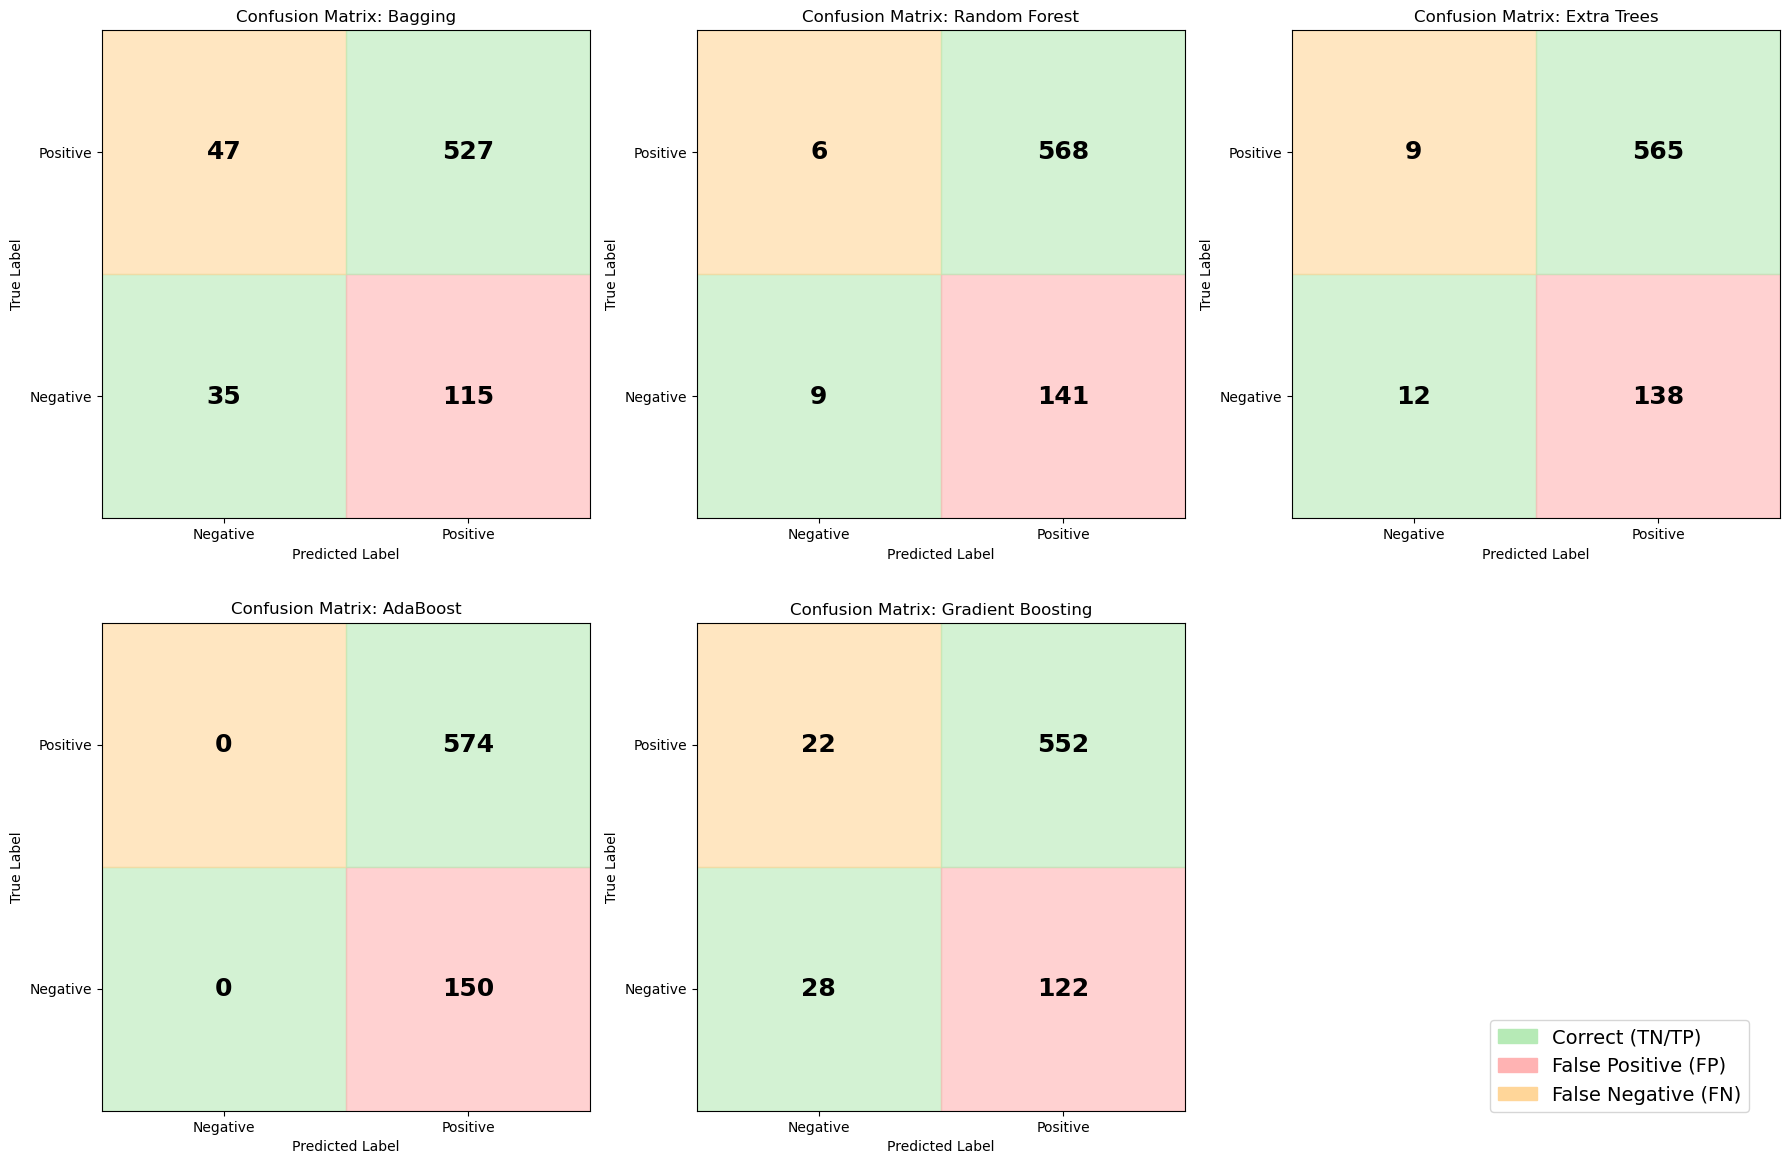

-----------------------------------------------------------------
Model              TN     FP     FN     TP     Type I   Type II 
-----------------------------------------------------------------
Bagging            35     115    47     527    0.767    0.082   
Random Forest      9      141    6      568    0.940    0.010   
Extra Trees        12     138    9      565    0.920    0.016   
AdaBoost           0      150    0      574    1.000    0.000   
Gradient Boosting  28     122    22     552    0.813    0.038   


In [27]:
# Calculate confusion matrices for all models
confusion_matrices = {}
for model_name, preds in predictions.items():
    confusion_matrices[model_name] = confusion_matrix(y_test, preds)

# Visualization for all models
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

# Color map for confusion matrix cells: TN (green), FP (red), FN (orange), TP (green)
cell_colors = np.array([['#b6eab6', '#ffb3b3'],   # TN, FP
                        ['#ffd699', '#b6eab6']])  # FN, TP

for i, (model_name, cm) in enumerate(confusion_matrices.items()):
    ax = axes[i]
    # Draw colored background for each cell
    for (row, col), val in np.ndenumerate(cm):
        ax.add_patch(
            mpatches.Rectangle((col, row), 1, 1, color=cell_colors[row, col], alpha=0.6)
        )
        ax.text(col + 0.5, row + 0.5, str(val), va='center', ha='center', fontsize=18, fontweight='bold')
    ax.set_xticks([0.5, 1.5])
    ax.set_yticks([0.5, 1.5])
    ax.set_xticklabels(['Negative', 'Positive'])
    ax.set_yticklabels(['Negative', 'Positive'])
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    ax.set_title(f'Confusion Matrix: {model_name}')
    ax.set_xlim(0, 2)
    ax.set_ylim(0, 2)
    ax.grid(False)
    ax.set_aspect('equal')

# Remove empty subplot if any
if len(confusion_matrices) < len(axes):
    for j in range(len(confusion_matrices), len(axes)):
        fig.delaxes(axes[j])

# Custom legend
legend_patches = [
    mpatches.Patch(color='#b6eab6', label='Correct (TN/TP)'),
    mpatches.Patch(color='#ffb3b3', label='False Positive (FP)'),
    mpatches.Patch(color='#ffd699', label='False Negative (FN)')
]
# Place legend in the free space (bottom right)
fig.legend(handles=legend_patches, loc='lower right', bbox_to_anchor=(0.98, 0.05), ncol=1, fontsize=14)
plt.tight_layout()
plt.show()

# Matrix Breakdown
print("-" * 65)
print(f"{'Model':<18} {'TN':<6} {'FP':<6} {'FN':<6} {'TP':<6} {'Type I':<8} {'Type II':<8}")
print("-" * 65)

for model_name, cm in confusion_matrices.items():
    tn, fp, fn, tp = cm.ravel()
    type_i_rate = fp / (fp + tn) if (fp + tn) > 0 else 0  # False Positive Rate
    type_ii_rate = fn / (fn + tp) if (fn + tp) > 0 else 0  # False Negative Rate

    print(f"{model_name:<18} {tn:<6} {fp:<6} {fn:<6} {tp:<6} {type_i_rate:<8.3f} {type_ii_rate:<8.3f}")

Evaluation Metrics:
                   Accuracy  Precision  Recall  F1_Score
Bagging              0.7762     0.8209  0.9181    0.8668
Random Forest        0.7970     0.8011  0.9895    0.8854
Extra Trees          0.7970     0.8037  0.9843    0.8849
AdaBoost             0.7928     0.7928  1.0000    0.8844
Gradient Boosting    0.8011     0.8190  0.9617    0.8846


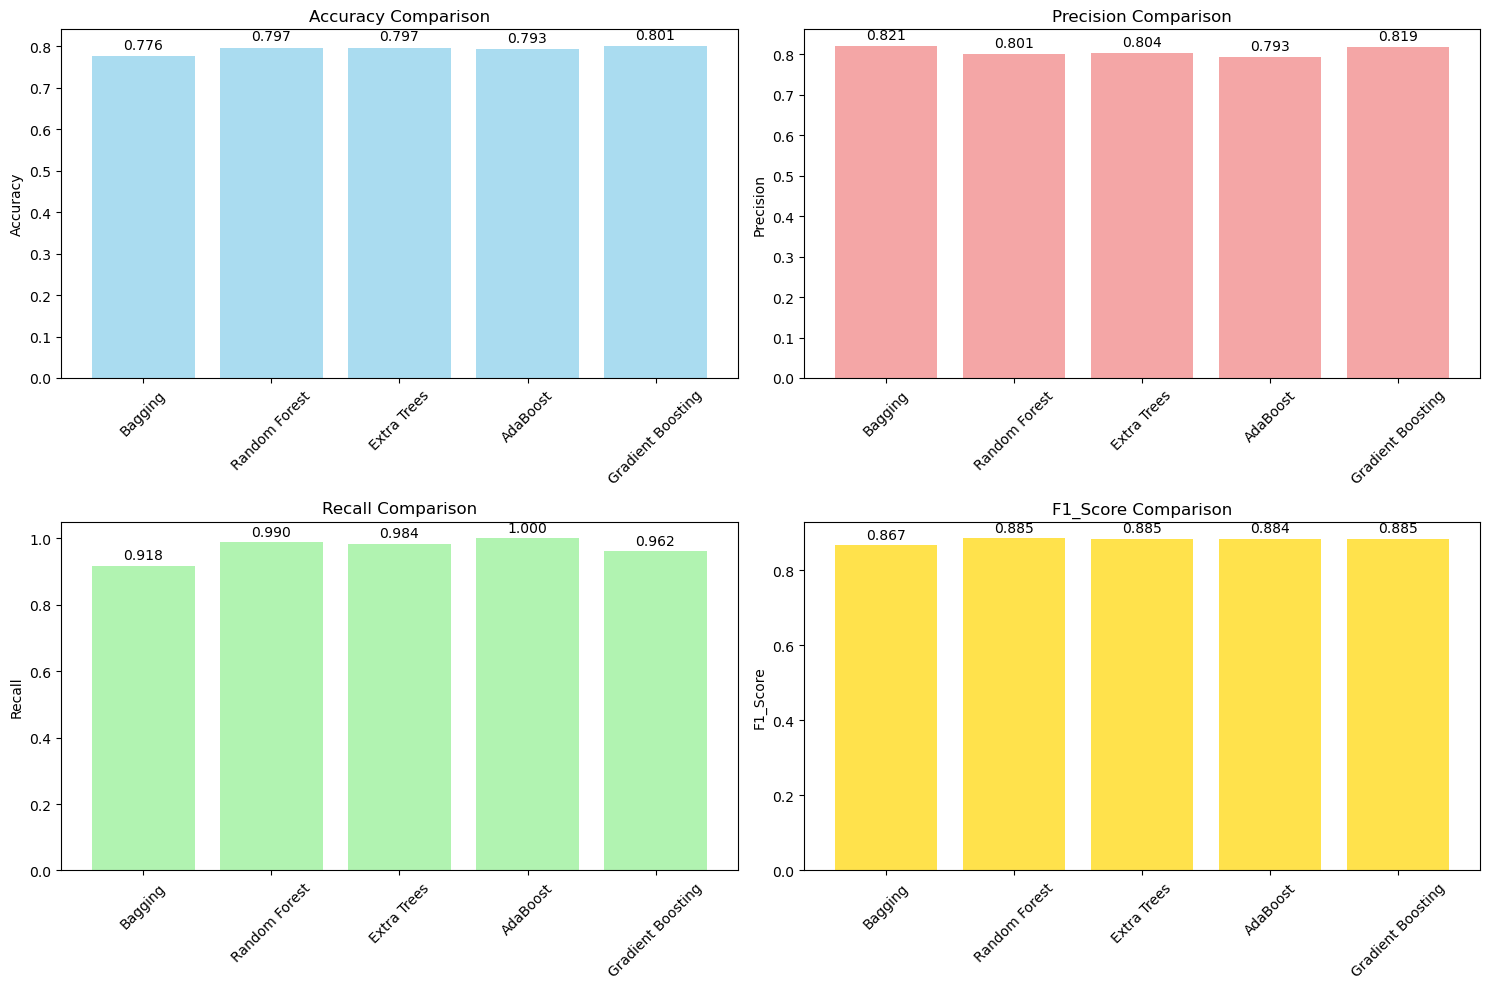

In [28]:
# Calculate and visualise model metrics
evaluation_results = {}
for model_name, preds in predictions.items():
    accuracy = accuracy_score(y_test, preds)
    precision = precision_score(y_test, preds)
    recall = recall_score(y_test, preds)
    f1 = f1_score(y_test, preds)

    evaluation_results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1_Score': f1
    }

# Evaluation DataFrame
eval_df = pd.DataFrame(evaluation_results).T
eval_df = eval_df.round(4)
print("Evaluation Metrics:")
print(eval_df)

# Visualize metrics comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1_Score']
colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold']

for i, metric in enumerate(metrics):
    ax = axes[i//2, i%2]
    ax.bar(eval_df.index, eval_df[metric], color=colors[i], alpha=0.7)
    ax.set_title(f'{metric} Comparison')
    ax.set_ylabel(metric)
    ax.tick_params(axis='x', rotation=45)

    # Add value labels on bars
    for j, v in enumerate(eval_df[metric]):
        ax.text(j, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

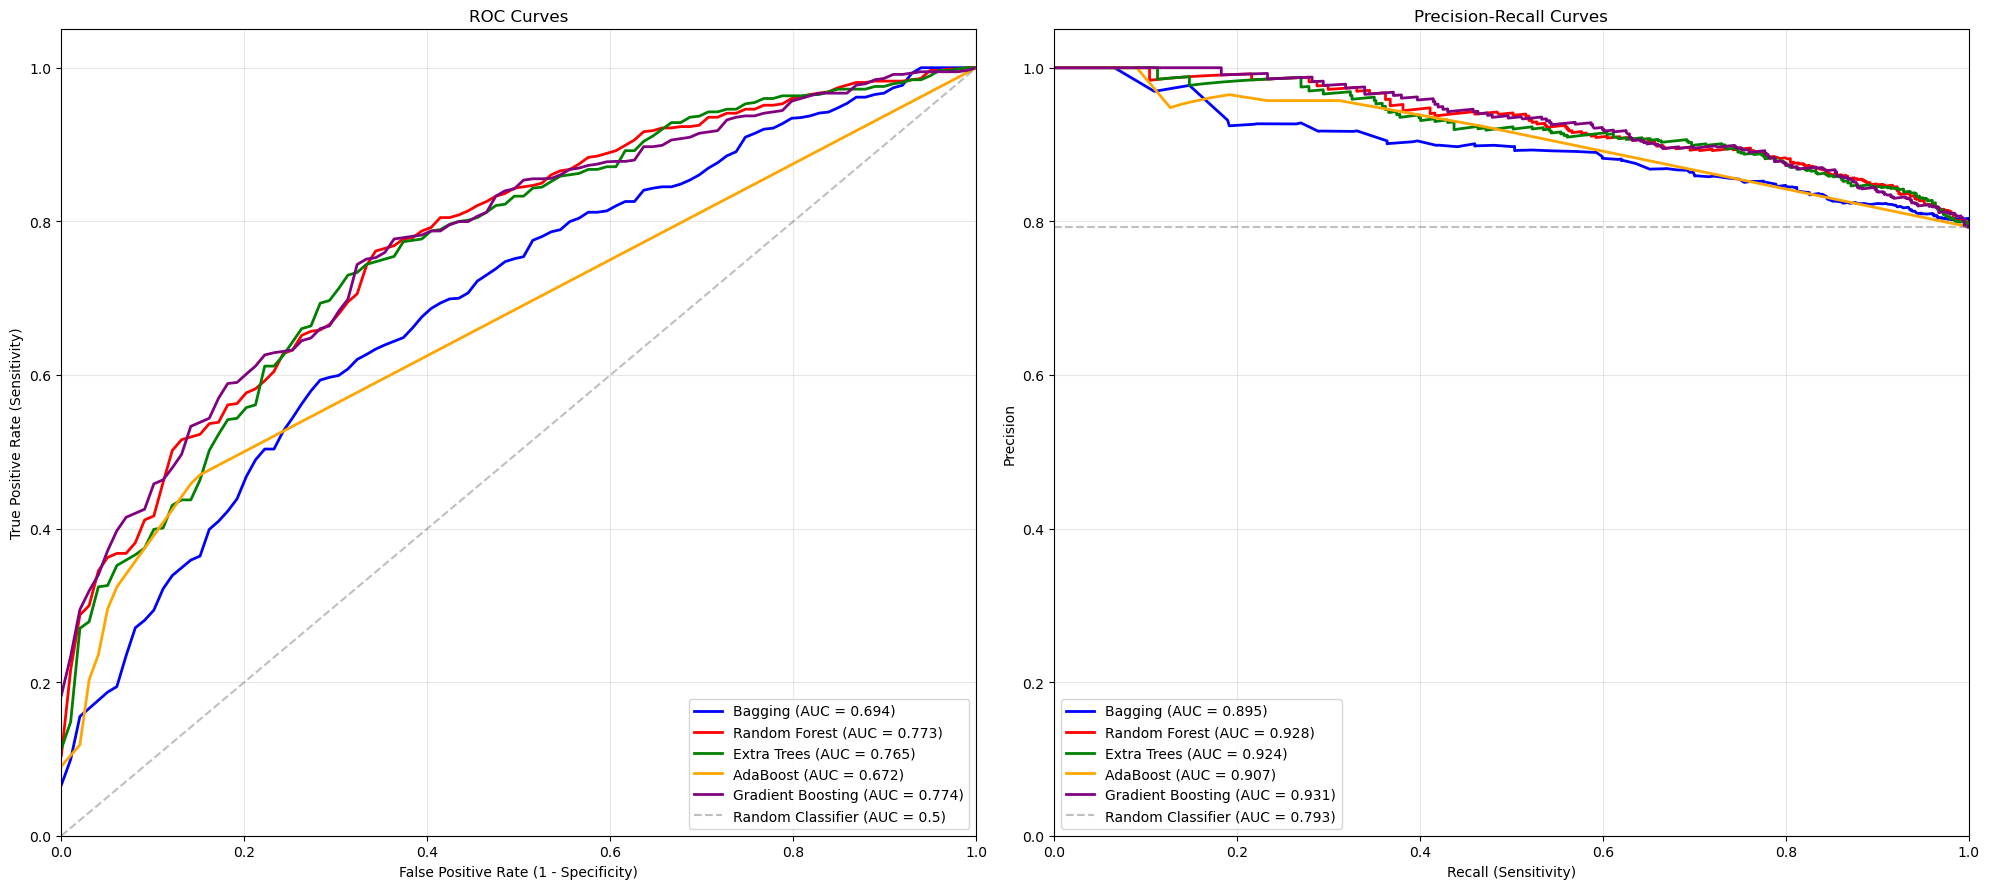

In [29]:
# Plot ROC and Precision-Recall Curves
plt.figure(figsize=(20, 9))

# Plot ROC curves for all models
plt.subplot(1, 2, 1)
roc_auc_scores = {}
colors = ['blue', 'red', 'green', 'orange', 'purple']

for i, (model_name, prob_pred) in enumerate(prob_predictions.items()):
    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, prob_pred)
    auc_score = roc_auc_score(y_test, prob_pred)
    roc_auc_scores[model_name] = auc_score

    # Smooth ROC curve using interpolation
    interp_fpr = np.linspace(0, 1, 100)
    interp_tpr = interp1d(fpr, tpr)(interp_fpr)

    # Plot ROC curve
    plt.plot(interp_fpr, interp_tpr, color=colors[i], linewidth=2,
             label=f'{model_name} (AUC = {auc_score:.3f})')

# Plot diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', alpha=0.5, label='Random Classifier (AUC = 0.5)')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curves')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)

# Plot Precision-Recall curves for all models
plt.subplot(1, 2, 2)
pr_auc_scores = {}

for i, (model_name, prob_pred) in enumerate(prob_predictions.items()):
    # Calculate Precision-Recall curve
    precision, recall, _ = precision_recall_curve(y_test, prob_pred)
    pr_auc = auc(recall, precision)
    pr_auc_scores[model_name] = pr_auc

    # Plot Precision-Recall curve
    plt.plot(recall, precision, color=colors[i], linewidth=2,
             label=f'{model_name} (AUC = {pr_auc:.3f})')

# Plot baseline for random classifier on PR curve
baseline_precision = y_test.sum() / len(y_test)
plt.plot([0, 1], [baseline_precision, baseline_precision], color='gray', linestyle='--', alpha=0.5, label=f'Random Classifier (AUC = {baseline_precision:.3f})')


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall (Sensitivity)')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend(loc="lower left")
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [30]:
# AUC scores ranking
auc_df = pd.DataFrame(list(roc_auc_scores.items()), columns=['Model', 'ROC_AUC_Score'])
auc_df = auc_df.sort_values('ROC_AUC_Score', ascending=False).reset_index(drop=True)

print("ROC-AUC Score Rankings:")
for i, row in auc_df.iterrows():
    print(f"{i + 1}. {row['Model']}: {row['ROC_AUC_Score']:.4f}")

# PR-AUC scores ranking
pr_auc_df = pd.DataFrame(list(pr_auc_scores.items()), columns=['Model', 'PR_AUC_Score'])
pr_auc_df = pr_auc_df.sort_values('PR_AUC_Score', ascending=False).reset_index(drop=True)

print("\nPR-AUC Score Rankings:")
for i, row in pr_auc_df.iterrows():
    print(f"{i + 1}. {row['Model']}: {row['PR_AUC_Score']:.4f}")

ROC-AUC Score Rankings:
1. Gradient Boosting: 0.7742
2. Random Forest: 0.7731
3. Extra Trees: 0.7652
4. Bagging: 0.6943
5. AdaBoost: 0.6716

PR-AUC Score Rankings:
1. Gradient Boosting: 0.9307
2. Random Forest: 0.9284
3. Extra Trees: 0.9243
4. AdaBoost: 0.9067
5. Bagging: 0.8950


In [31]:
# Set costs for different scenarios
print("\nCost Scenario Definitions:")

cost_scenarios = {
    'Risk-Averse (High False Alarm Cost)': {'cost_fp': 2.5, 'cost_fn':1 },
    'Balanced': {'cost_fp': 1, 'cost_fn': 1},
    'Risk-Seeking (High Miss Cost)': {'cost_fp': 1, 'cost_fn': 2.5},
}

for scenario, costs in cost_scenarios.items():
    print(f"- {scenario}: Type I Cost = {costs['cost_fp']}, Type II Cost = {costs['cost_fn']}")


Cost Scenario Definitions:
- Risk-Averse (High False Alarm Cost): Type I Cost = 2.5, Type II Cost = 1
- Balanced: Type I Cost = 1, Type II Cost = 1
- Risk-Seeking (High Miss Cost): Type I Cost = 1, Type II Cost = 2.5


Analyzing threshold optimization for: Gradient Boosting


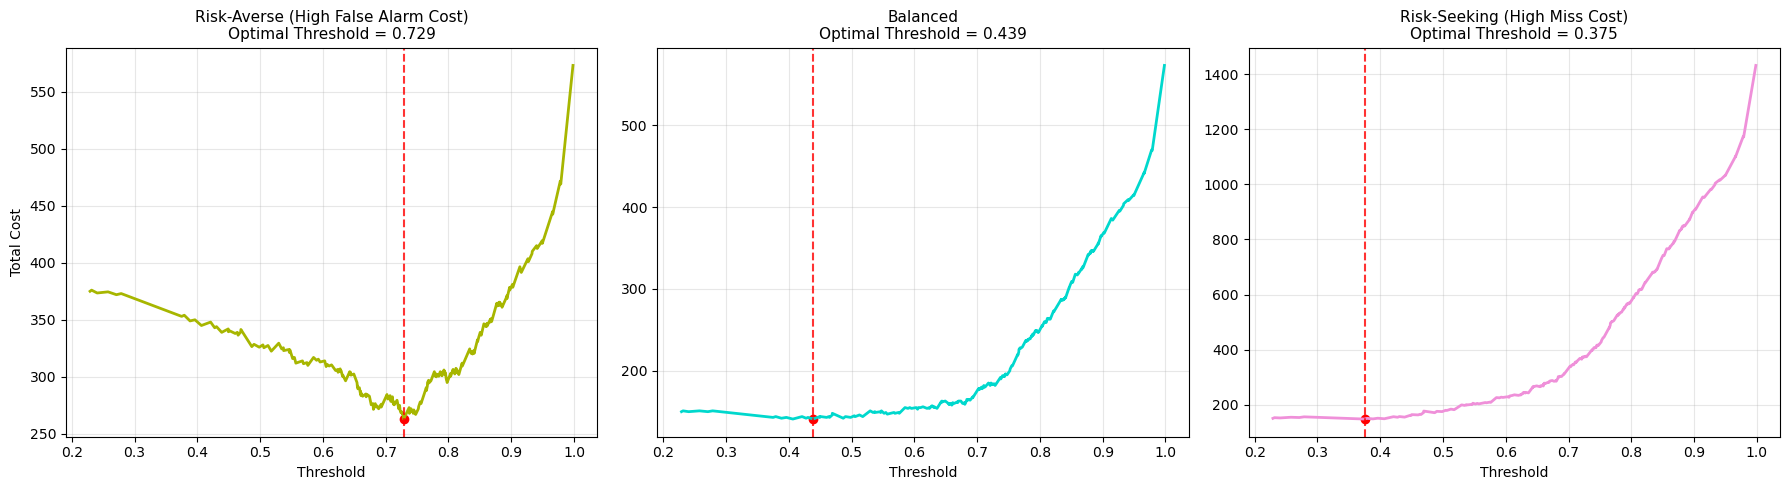


Threshold Optimization Summary:
Scenario                                 │ Optimal_Threshold │ Total_Cost  │ Accuracy  │ Precision  │ Recall   │ F1_Score  │ FP   │ FN  
Risk-Averse (High False Alarm Cost)      │ 0.729             │ 263.0       │ 0.749     │ 0.892      │ 0.777    │ 0.831     │ 54   │ 128 
Balanced                                 │ 0.439             │ 141.0       │ 0.805     │ 0.811      │ 0.984    │ 0.889     │ 132  │ 9   
Risk-Seeking (High Miss Cost)            │ 0.375             │ 147.5       │ 0.802     │ 0.803      │ 0.995    │ 0.889     │ 140  │ 3   


In [32]:
# Threshold optimisation for the best model (ROC-PR AUC) with respect to costs
best_model_name = auc_df.iloc[0]['Model']
best_prob_pred = prob_predictions[best_model_name]

print(f"Analyzing threshold optimization for: {best_model_name}")

colors = ["#a7b600", "#00d8cd", "#ef90d9"]
results = []

# Create 1x3 subplot layout
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, (scenario_name, costs) in enumerate(cost_scenarios.items()):
    fpr, tpr, thresholds = roc_curve(y_test, best_prob_pred)
    total_costs = []

    for thr in thresholds:
        thr_preds = (best_prob_pred >= thr).astype(int)
        tn, fp, fn, tp = confusion_matrix(y_test, thr_preds).ravel()
        total_costs.append(fp * costs['cost_fp'] + fn * costs['cost_fn'])

    total_costs = np.array(total_costs)
    opt_idx = np.argmin(total_costs)
    opt_thr = thresholds[opt_idx]
    opt_cost = total_costs[opt_idx]

    # Predictions and metrics at optimal threshold
    opt_thr_preds = (best_prob_pred >= opt_thr).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, opt_thr_preds).ravel()
    accuracy = accuracy_score(y_test, opt_thr_preds)
    precision = precision_score(y_test, opt_thr_preds)
    recall = recall_score(y_test, opt_thr_preds)
    f1 = f1_score(y_test, opt_thr_preds)

    # Plot
    ax = axes[i]
    ax.plot(thresholds, total_costs, color=colors[i], linewidth=2)
    ax.axvline(x=opt_thr, color='red', linestyle='--', alpha=0.8)
    ax.scatter([opt_thr], [opt_cost], color='red')
    ax.set_title(f"{scenario_name}\nOptimal Threshold = {opt_thr:.3f}", fontsize=11)
    ax.set_xlabel('Threshold')
    if i == 0:
        ax.set_ylabel('Total Cost')
    ax.grid(True, alpha=0.3)

    # Store results
    results.append({
        'Scenario': scenario_name,
        'Optimal_Threshold': round(opt_thr, 3),
        'Total_Cost': round(opt_cost, 2),
        'Accuracy': round(accuracy, 3),
        'Precision': round(precision, 3),
        'Recall': round(recall, 3),
        'F1_Score': round(f1, 3),
        'False_Positive': fp,
        'False_Negative': fn
    })

plt.tight_layout()
plt.show()

# Print Threshold Optimization Summary
results_df = pd.DataFrame(results)
print("\nThreshold Optimization Summary:")
print("=" * 137)
print(f"{'Scenario':<40} │ {'Optimal_Threshold':<17} │ {'Total_Cost':<11} │ {'Accuracy':<9} │ {'Precision':<10} │ {'Recall':<8} │ {'F1_Score':<9} │ {'FP':<4} │ {'FN':<4}")
print("=" * 137)

for _, row in results_df.iterrows():
    print(f"{row['Scenario']:<40} │ {row['Optimal_Threshold']:<17} │ {row['Total_Cost']:<11} │ "
          f"{row['Accuracy']:<9} │ {row['Precision']:<10} │ {row['Recall']:<8} │ {row['F1_Score']:<9} │ "
          f"{row['False_Positive']:<4} │ {row['False_Negative']:<4}")

print("=" * 137)

Analyzing threshold optimization for: Random Forest


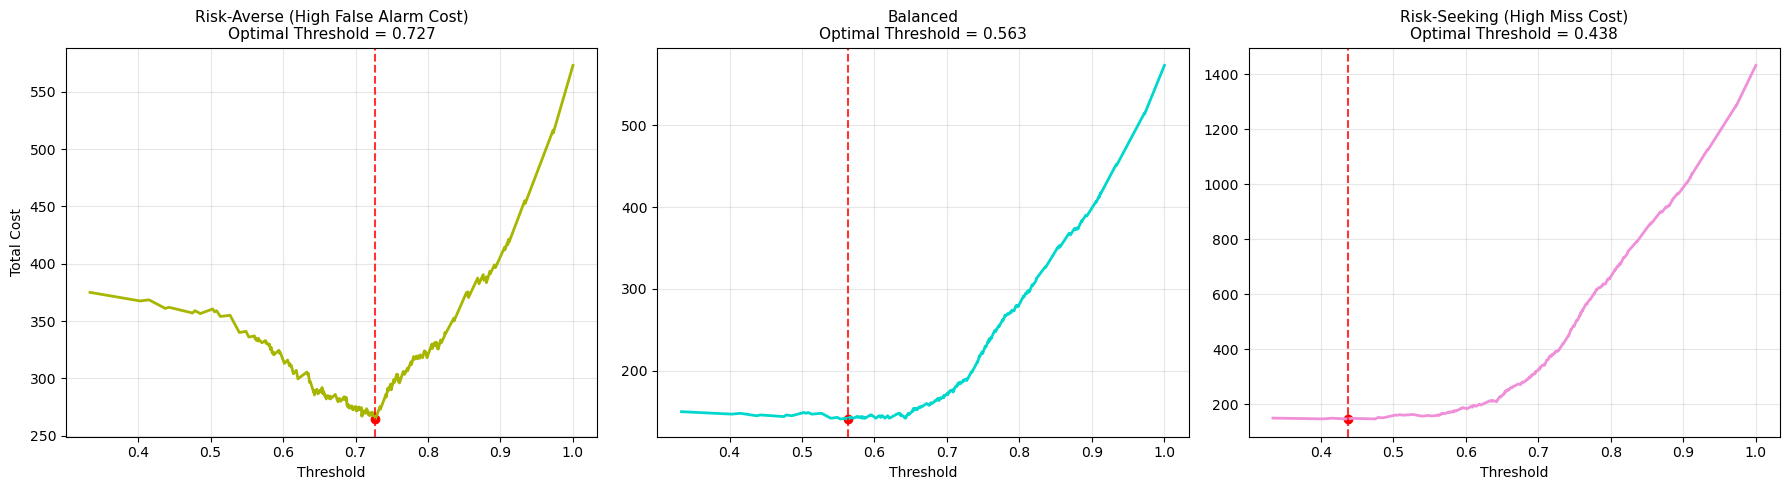


Threshold Optimization Summary:
Scenario                                 │ Optimal_Threshold │ Total_Cost  │ Accuracy  │ Precision  │ Recall   │ F1_Score  │ FP   │ FN  
Risk-Averse (High False Alarm Cost)      │ 0.727             │ 264.5       │ 0.74      │ 0.895      │ 0.761    │ 0.823     │ 51   │ 137 
Balanced                                 │ 0.563             │ 141.0       │ 0.805     │ 0.814      │ 0.977    │ 0.888     │ 128  │ 13  
Risk-Seeking (High Miss Cost)            │ 0.438             │ 146.5       │ 0.8       │ 0.799      │ 0.998    │ 0.888     │ 144  │ 1   


In [33]:
# Threshold optimisation for the best model(F1 Score) with respect to costs
best_model_name = auc_df.iloc[1]['Model']
best_prob_pred = prob_predictions[best_model_name]

print(f"Analyzing threshold optimization for: {best_model_name}")

colors = ["#a7b600", "#00d8cd", "#ef90d9"]
results = []

# Create 1x3 subplot layout
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, (scenario_name, costs) in enumerate(cost_scenarios.items()):
    fpr, tpr, thresholds = roc_curve(y_test, best_prob_pred)
    total_costs = []

    for thr in thresholds:
        thr_preds = (best_prob_pred >= thr).astype(int)
        tn, fp, fn, tp = confusion_matrix(y_test, thr_preds).ravel()
        total_costs.append(fp * costs['cost_fp'] + fn * costs['cost_fn'])

    total_costs = np.array(total_costs)
    opt_idx = np.argmin(total_costs)
    opt_thr = thresholds[opt_idx]
    opt_cost = total_costs[opt_idx]

    # Predictions and metrics at optimal threshold
    opt_thr_preds = (best_prob_pred >= opt_thr).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, opt_thr_preds).ravel()
    accuracy = accuracy_score(y_test, opt_thr_preds)
    precision = precision_score(y_test, opt_thr_preds)
    recall = recall_score(y_test, opt_thr_preds)
    f1 = f1_score(y_test, opt_thr_preds)

    # Plot
    ax = axes[i]
    ax.plot(thresholds, total_costs, color=colors[i], linewidth=2)
    ax.axvline(x=opt_thr, color='red', linestyle='--', alpha=0.8)
    ax.scatter([opt_thr], [opt_cost], color='red')
    ax.set_title(f"{scenario_name}\nOptimal Threshold = {opt_thr:.3f}", fontsize=11)
    ax.set_xlabel('Threshold')
    if i == 0:
        ax.set_ylabel('Total Cost')
    ax.grid(True, alpha=0.3)

    # Store results
    results.append({
        'Scenario': scenario_name,
        'Optimal_Threshold': round(opt_thr, 3),
        'Total_Cost': round(opt_cost, 2),
        'Accuracy': round(accuracy, 3),
        'Precision': round(precision, 3),
        'Recall': round(recall, 3),
        'F1_Score': round(f1, 3),
        'False_Positive': fp,
        'False_Negative': fn
    })

plt.tight_layout()
plt.show()

# Print Threshold Optimization Summary
results_df = pd.DataFrame(results)
print("\nThreshold Optimization Summary:")
print("=" * 137)
print(f"{'Scenario':<40} │ {'Optimal_Threshold':<17} │ {'Total_Cost':<11} │ {'Accuracy':<9} │ {'Precision':<10} │ {'Recall':<8} │ {'F1_Score':<9} │ {'FP':<4} │ {'FN':<4}")
print("=" * 137)

for _, row in results_df.iterrows():
    print(f"{row['Scenario']:<40} │ {row['Optimal_Threshold']:<17} │ {row['Total_Cost']:<11} │ "
          f"{row['Accuracy']:<9} │ {row['Precision']:<10} │ {row['Recall']:<8} │ {row['F1_Score']:<9} │ "
          f"{row['False_Positive']:<4} │ {row['False_Negative']:<4}")

print("=" * 137)

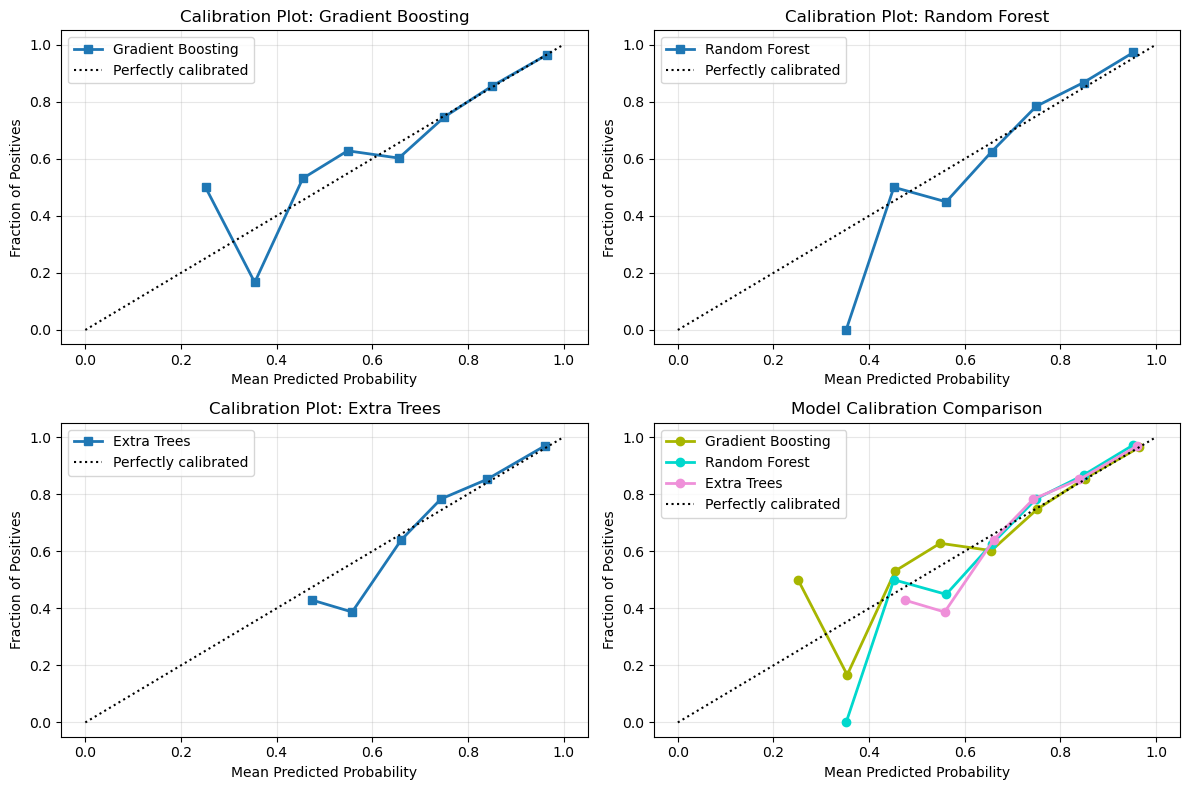

In [34]:
# Calibration Plots for Top 3 Models
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve

# Fallback color palette if not defined earlier
if 'colors' not in globals():
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

plt.figure(figsize=(12, 8))

# Calibration plot for top 3 models
top_models = auc_df.head(3)['Model'].tolist()

for i, model_name in enumerate(top_models):
    prob_pred = prob_predictions[model_name]
    
    # Calculate calibration curve
    fraction_of_positives, mean_predicted_value = calibration_curve(y_test, prob_pred, n_bins=10)
    
    plt.subplot(2, 2, i+1)
    plt.plot(mean_predicted_value, fraction_of_positives, "s-", linewidth=2, label=model_name)
    plt.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
    plt.xlabel("Mean Predicted Probability")
    plt.ylabel("Fraction of Positives")
    plt.title(f'Calibration Plot: {model_name}')
    plt.legend()
    plt.grid(True, alpha=0.3)

# Reliability diagram for all models
plt.subplot(2, 2, 4)
for i, model_name in enumerate(top_models):
    prob_pred = prob_predictions[model_name]
    fraction_of_positives, mean_predicted_value = calibration_curve(y_test, prob_pred, n_bins=10)
    plt.plot(mean_predicted_value, fraction_of_positives, "o-", linewidth=2, label=model_name, color=colors[i])

plt.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
plt.xlabel("Mean Predicted Probability")
plt.ylabel("Fraction of Positives") 
plt.title("Model Calibration Comparison")
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()